# Numerical Simulation Laboratory

# Numerical exercise 9

## Algoritmo Genetico
Sviluppo di un algoritmo genetico per la soluzione del *Travelling Salesman Problem*. 

Fissate le posizioni $\vec{c}_0, \vec{c}_1, \dots, \vec{c}_N$ di $N$ città, genero casualmente una popolazione di possibili percorsi che, partendo sempre dalla stessa città, attraversano tutte le città una e una sola volta terminando nella città di partenza. Fissate le coordinate delle varie cttà rappresento i possibili percorsi tramite vettori di interi che indicano nell'ordine quali città vengono raggiunte durante il cammino. Ad esempio il vettore 
$$ \left [0, 1, 2, \dots, n, \dots N \right] \,,$$
indica che le città devono essere percorse nell'ordine $\vec{c}_0, \vec{c}_1, \vec{c}_2 \dots, \vec{c}_n, \dots, \vec{c}_N$. Per ciascun percorso della popolazione calcolo la lunghezza e determino la fitness come inverso della lunghezza:
    $$ L(\vec{x}_0, \vec{x}_1, \dots, \vec{x}_N) = \sum_{i=1}^N |\vec{x}_{i+1} - \vec{x}_i|\,,$$
dove $x_i$ sono le coordinate dell'i-esima città del percorso. Ad ogni iterazione dell'algoritmo, partendo dalla popolazione esistente, determino una nuova generazione di percorsi sfruttando il **crossover tra individui** ed eventuali **mutazioni**. In particolare, selezionando gli individui con fitness più elevata, posso ottenere percorsi migliori e minimizzare progressivamente il percorso tra le città: il codice che ho sviluppato utilizza una *roulette wheel selection* per selezionare quali individui riprodurre in modo da ottenere generazioni di percorsi via via migliori. Inoltre ho utilizzato un **algoritmo elitario** che ad ogni iterazione mantiene il 5% degli individui migliori, riportandoli identici nella generazione successiva. 

### <font color='red'> Roulette Wheel Selection</font>
Ho implementato l'operatore di selezione sfruttando il procedimento della *roulette wheel selection* per scegliere i percorsi in modo casuale con una probabilità proporzionale alla fitness. Detta $f_i$ la fitness del percorso $i$-esimo, calcolo la somma della fitness di tutti gli individui della popolazione
    $$ F = \sum_{i=1}^N f_i \,,$$
e genero un numero casuale $\alpha$ distribuito uniformemente nell'intervallo $[0,F]$. Dopo aver ordinato i percorsi secondo la fitness decrescente, calcolo la somma parziale delle fitness dei percorsi fino al cammino $M$-esimo per il quale $F_{part} > \alpha$ dove $ F_{part} = \sum_{i=1}^M f_i$. In questo modo seleziono i percorsi in modo casuale ma con probabilità proporzionale alla fitness: ciò mi consente di selezionare gli individui migliori e ottenere progressivamente percorsi più brevi. 

### <font color='red'> Crossover e  Mutazioni</font>
Per determinare una nuova generazione a partire da una popolazione data, utilizzo gli operatori di crossover ed eventuali mutazioni. Selezionati due individui genitori tramite *roulette wheel selection* applico il crossover con una probabilità $P_{cross} = 0.65$. Nel caso in cui tale crossover non venga applicato aggiungo i percorsi senza modificarli nella generazione successiva, altrimenti ottengo due percorsi figli su cui applico anche eventuali mutazioni prima di aggiungerli alla nuova popolazione. In particolare ho implementato ed utilizzato i seguenti operatori di mutazione:

- *Pair permutation*, che consiste nello scambio di due città scelte casualmente, ad eccezione della prima che non deve essere modificata. Applico l'operatore con una probabilità $P_{pair} = 0.1$.

- *Reverse*, che consiste nell'inversione dell'ordine con cui vengono percorse 2,3 o 4 città lungo il cammino. La città da cui parte l'inversione viene scelta in modo casuale trascurando la prima città del percorso che non deve essere modificata. Applico l'operatore con una probabilità $P_{rev} = 0.05$.

- *Shift*, che consiste nello slittamento di 2,3 o 4 città lungo il percorso ad eccezione della prima la cui posizione deve rimanere invariata. Applico l'operatore con una probabilità $P_{shift} = 0.03$.

Applico al più uno solo di questi operatori di mutazione su ogni nuovo individuo generato tramite crossover. Ad ogni step determino una nuova popolazione tanto numerosa quanto la precedente: dopo aver selezionato l'élite dei migliori percorsi applico ripetutamente il crossover tra individui finchè ottengo il numero di percorsi desiderato.

### <font color='blue'> Città lungo una Circonferenza</font>
Applico l'algoritmo genetico al caso di $32$ città disposte lungo una circonferenza di raggio $r=10$. Utilizzo una popolazione formata da $500$ percorsi e costruisco $1000$ generazioni successive per trovare il percorso più breve. Ad ogni nuova generazione mantengo un'élite composta dal 5% dei percorsi migliori della generazione precedente.

Nel grafico sottostante sono riportate la lunghezza del percorso migliore e la media delle lunghezze della metà migliore della popolazione in funzione delle generazioni create dall'algoritmo. Si può osservare un andamento molto simile delle due curve che convergono ad un risultato ottimale.

Lunghezza del percorso finale: 62.403


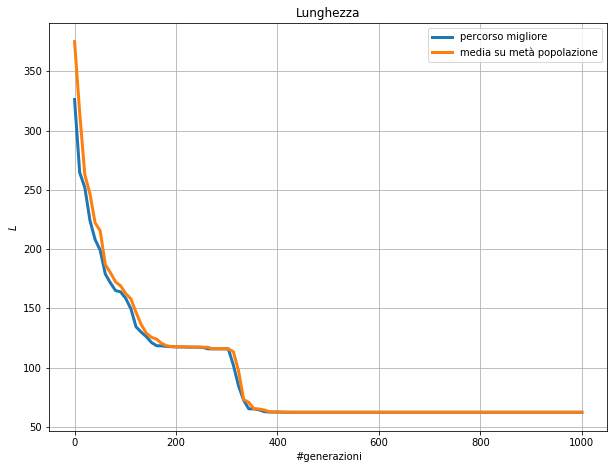

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7.5))
x = np.linspace(0, 1000, 100)

x1, L1 = np.loadtxt('./Files/Circle/lenght.out', delimiter='  ', unpack=True)
avex1, aveL1 = np.loadtxt('./Files/Circle/avelenght.out', delimiter='  ', unpack=True)
print("Lunghezza del percorso finale:", L1[len(L1)-1])

plt.plot(x, L1, label='percorso migliore', lw=3)
plt.plot(x, aveL1, label='media su metà popolazione', lw=3)
plt.title("Lunghezza")
plt.legend()
plt.xlabel('#generazioni')
plt.ylabel('$L$')
plt.grid(True)

Il grafico sottostante mostra il percorso migliore dell'ultima generazione costruita dall'algoritmo. Come si può osservare il percorso è il più breve possibile in quanto corrisponde ad unire le città tramite le corde che sottendono gli archi della circonferenza su cui si trovano le città.

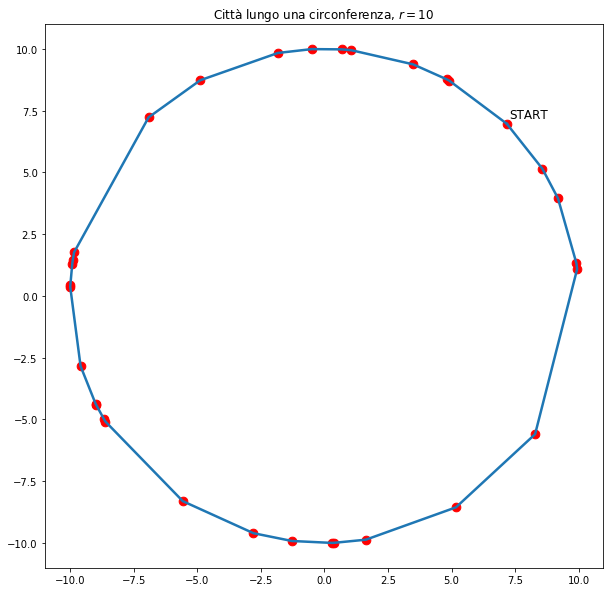

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

plt.figure(figsize=(10, 10))
ncities = 32

xc, yc = np.loadtxt('./Files/Circle/cities.out', unpack=True)
path = np.loadtxt('./Files/Circle/best_path.out', unpack=True)

xp = []
yp = []

for i in range(ncities):
    index = int(path[i])
    xp.append(xc[index])
    yp.append(yc[index])

index = int(path[0])
xp.append(xc[index])
yp.append(yc[index])

#numerazione delle città
#for i in range(32):
#    plt.text(xp[i]+0.1, yp[i]+0.1, i, fontsize=12)

plt.title("Città lungo una circonferenza, $r=10$")
plt.text(xc[0]+0.1, yc[0]+0.25, 'START', fontsize=12)
plt.scatter(xc, yc, s=75, c='red') #città
plt.plot(xp, yp,  zorder=1, lw=2.5) #percorso

plt.show()

### <font color='blue'> Città in un Quadrato</font>
Applico l'algoritmo genetico al caso di $32$ città disposte casualmente all'interno di un quadrato di lato $l=10$. Utilizzo una popolazione formata da $500$ percorsi e costruisco $2000$ generazioni successive per trovare il percorso più breve. Ad ogni nuova generazione mantengo un'élite composta dal 5% dei percorsi migliori della generazione precedente.

Nel grafico sottostante sono riportate la lunghezza del percorso migliore e la media delle lunghezze della metà migliore della popolazione in funzione delle generazioni create dall'algoritmo. Si può osservare un andamento molto simile delle due curve che convergono ad un risultato ottimale.

Lunghezza del percorso finale: 48.5786


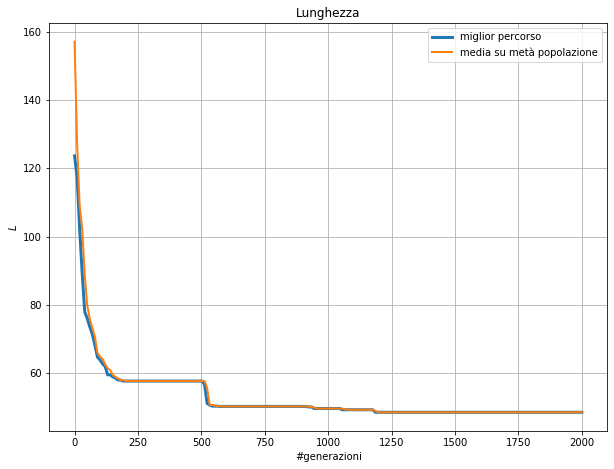

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7.5))
x = np.linspace(0, 2000, 200)

x1, L1 = np.loadtxt('./Files/Square/lenght.out', delimiter='  ', unpack=True)
avex1, aveL1 = np.loadtxt('./Files/Square/avelenght.out', delimiter='  ', unpack=True)
print("Lunghezza del percorso finale:", L1[len(L1)-1])

plt.plot(x, L1, label='miglior percorso', lw=3)
plt.plot(x, aveL1, label='media su metà popolazione', lw=2)
plt.title("Lunghezza")
plt.legend()
plt.xlabel('#generazioni')
plt.ylabel('$L$')
plt.grid(True)

Il grafico sottostante mostra il percorso migliore dell'ultima generazione costruita dall'algoritmo. Come si può osservare l'algoritmo minimizza il percorso eliminando gli incroci tra le città minimizzando in modo significativo la lunghezza del cammnino. La figura mostra che l'algoritmo non riesce ad eliminare l'ultimo incrocio perciò il programma non converge al miglior risultato possibile.

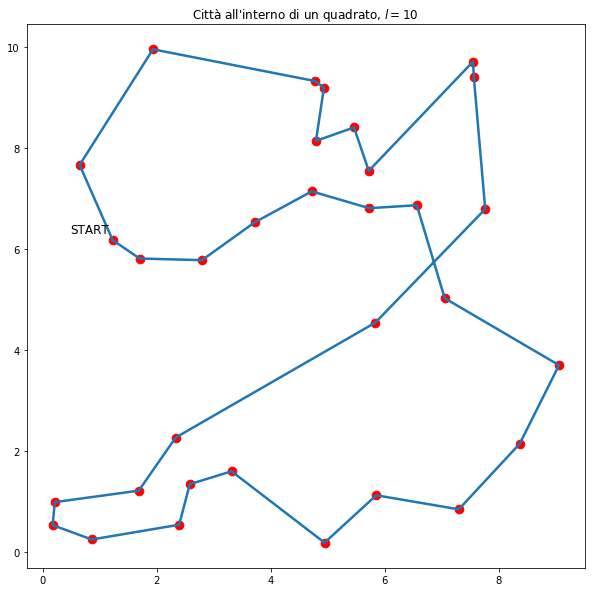

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

plt.figure(figsize=(10, 10))
ncities = 32

xc, yc = np.loadtxt('./Files/Square/cities.out', unpack=True)
path = np.loadtxt('./Files/Square/best_path.out', unpack=True)

xp = []
yp = []

for i in range(ncities):
    index = int(path[i])
    xp.append(xc[index])
    yp.append(yc[index])

index = int(path[0])
xp.append(xc[index])
yp.append(yc[index])

#numerazione delle città
#for i in range(32):
#    plt.text(xp[i]+0.1, yp[i]+0.1, i, fontsize=12)

plt.title("Città all'interno di un quadrato, $l=10$")
plt.text(xc[0]-0.75, yc[0]+0.15, 'START', fontsize=12)
plt.scatter(xc, yc, s=75, c='red') #città
plt.plot(xp, yp,  zorder=1, lw=2.5) #percorso
plt.show()